In [1]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

@doc juliamap

juliamap(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


In [2]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Vectorize j0 over arrays of Complex numbers
@vectorize_1arg Complex j0

# List the available methods for j0 for different types
methods(j0)

# 4 methods for generic function "j0":
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},1}) at operators.jl:380
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},2}) at operators.jl:381
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},N}) at operators.jl:383
j0(z) at In[2]:2

The first part of the code just creates a complex plane.
Afterwards, we call j0(z) to equal to the function returned by juliamap(0,z) when c = 0. 
The code then vectorizes j0 over the Complex numbers with the macro @vectorize_1arg

Calling methods(j0) to see its methods, we see that j0(z) is defined in the inline In[2],
and that the j0(z) takes in a subset of the Complex numbers, which is a subset of the Real numbers, and creates a 1 dimensional array, specifically an abstract array, which is also a subset of the complex numbers, subset of real numbers.
The method also applies for a 2 dimensional array, and an N dimensional array for general terms. 
j0 now includes a method that handles these types because we vectorize it over the arrays of Complex numbers earlier, which contains any type T, subtype of Complex, which are composed of parts of any type T, subtype of R. 
So in doing so, it gets applied, or inherited, to j0. 

All variables in front of the semicolon are positional arguments, while the variables after the semicolon are keyword arguments.

In [3]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [4]:
# The vectorized function can be applied directly to the plane
@time cp = complex_plane()
@time j0p = j0(cp)

  0.714885 seconds (548.69 k allocations: 85.142 MB, 2.71% gc time)
  0.814081 seconds (37.81 k allocations: 32.261 MB, 1.65% gc time)


2000x2000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

The function first defines the creation of a complex plane, with defaulted values, creating a 2000 x 2000 grid, titled cp.
Then the code applies the j0(z) function to the complex plane cp and what results is Out[4]
Which only took less than a second to run. Very fast.

In [4]:
immutable ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Complex{Float64},2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [5]:
cp = ComplexPlane(xpoints=200,ypoints=200);
typeof(cp)

ComplexPlane

In [6]:
print(typeof(cp.x))
j0(cp.z)

LinSpace{Float64}

200x200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

Immutable makes it so that the complex plane can not be changed. So after the ComplexPlane is called, cp will not be able to be altered. 
A difference between this with Pthon is that the you can declare what is immutable before the function is declared. 

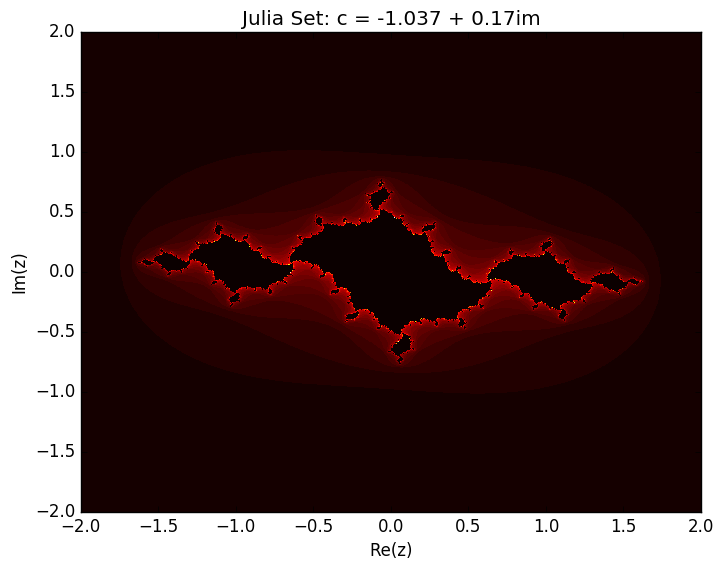

PyObject <matplotlib.collections.QuadMesh object at 0x7fee039c3bd0>

In [7]:
using PyPlot                         #  Load package into the current namespace
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
#display(gcf())                       #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file

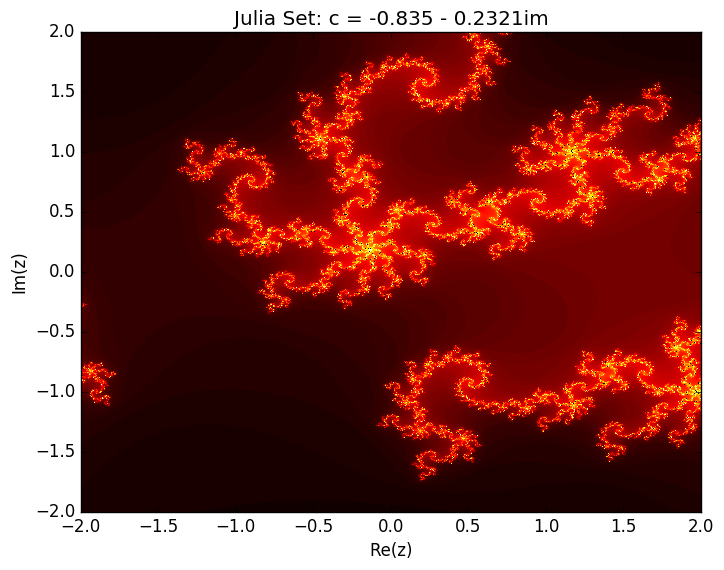

PyObject <matplotlib.collections.QuadMesh object at 0x7fee03f4bb50>

In [8]:
c = -0.835 - 0.2321im                  #  Set starting point of julia set
j(z) = juliamap(c, 1+0.2im*sin(z))                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))

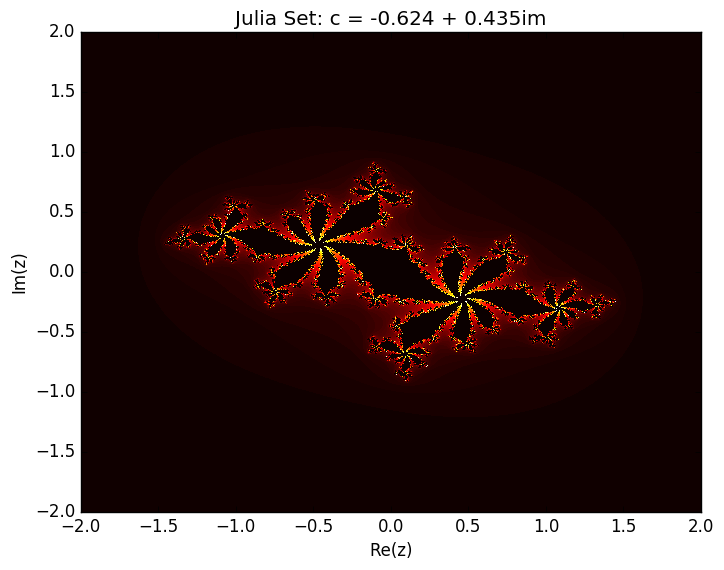

PyObject <matplotlib.collections.QuadMesh object at 0x7f5a11a17810>

In [9]:
c = -0.624 + 0.435im                   #  Set starting point of julia set
j(z) = juliamap(c,  z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))


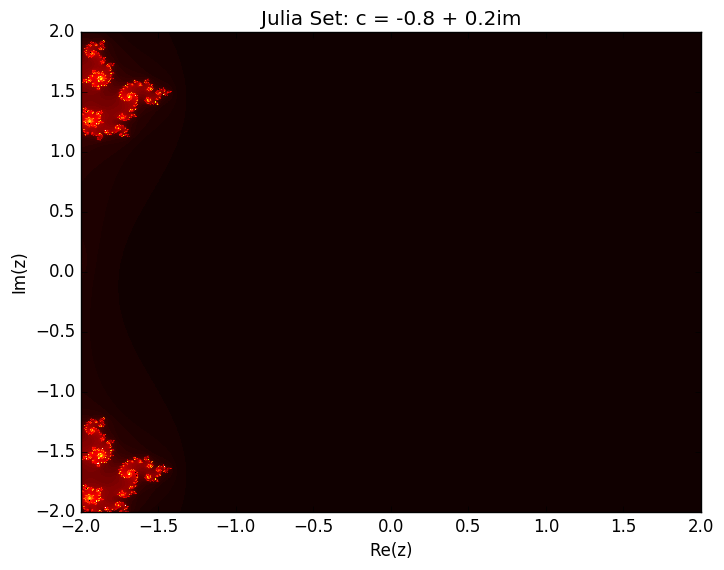

PyObject <matplotlib.collections.QuadMesh object at 0x7f5a0b594790>

In [13]:
c = -0.8 + 0.2im                   #  Set starting point of julia set
j(z) = juliamap(c,  2im*pi*exp(z))                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))


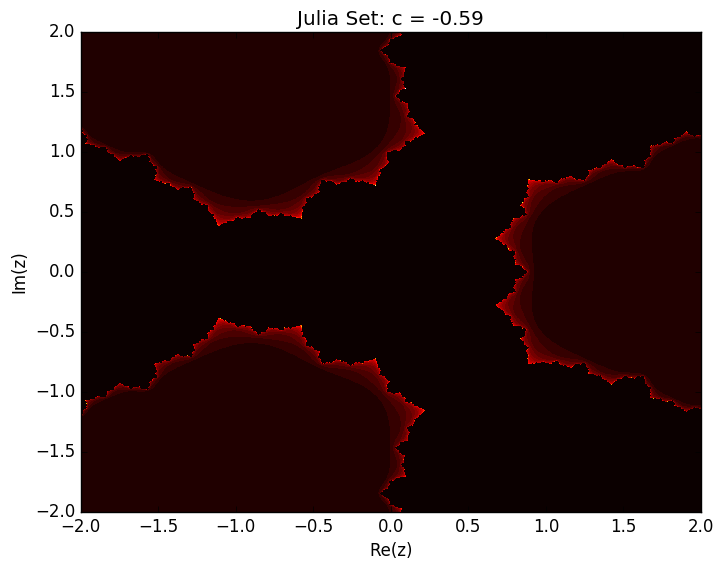

PyObject <matplotlib.collections.QuadMesh object at 0x7fee03a937d0>

In [11]:
c = -0.59                   #  Set starting point of julia set
j(z) = juliamap(c,  exp(z^3) - 0.59)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))

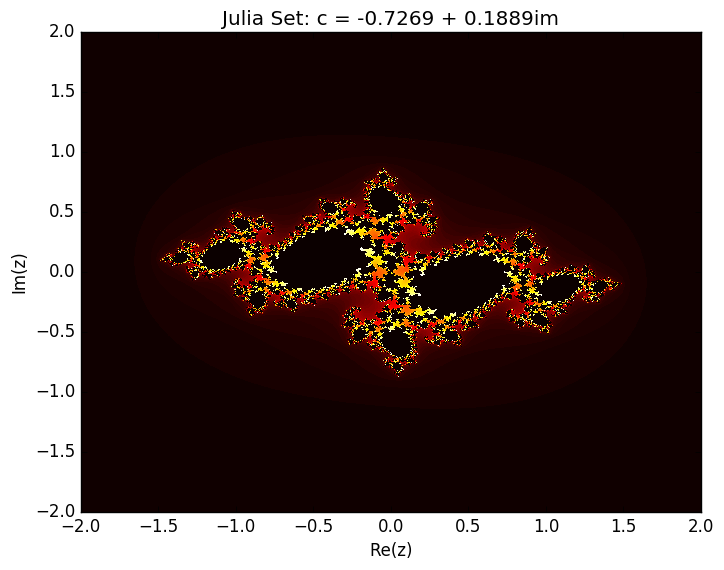

PyObject <matplotlib.collections.QuadMesh object at 0x7fee03998750>

In [12]:
c = -0.7269+0.1889im                  #  Set starting point of julia set
j(z) = juliamap(c,  z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))